In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
! cp "/content/drive/MyDrive/Colab Notebooks/archive.zip" "/content/"

In [20]:
! unzip archive.zip -d /content/captcha

Streaming output truncated to the last 5000 lines.
  inflating: /content/captcha/xK1mM.jpg  
  inflating: /content/captcha/xK2Q6.jpg  
  inflating: /content/captcha/xK3Yl.jpg  
  inflating: /content/captcha/xK5fU.jpg  
  inflating: /content/captcha/xKA6K.jpg  
  inflating: /content/captcha/xKEYy.jpg  
  inflating: /content/captcha/xKF1u.jpg  
  inflating: /content/captcha/xKJ3w.jpg  
  inflating: /content/captcha/xKMhX.jpg  
  inflating: /content/captcha/xKO5H.jpg  
  inflating: /content/captcha/xKRRk.jpg  
  inflating: /content/captcha/xKRzV.jpg  
  inflating: /content/captcha/xKSq3.jpg  
  inflating: /content/captcha/xKT3T.jpg  
  inflating: /content/captcha/xKWIw.jpg  
  inflating: /content/captcha/xKWYc.jpg  
  inflating: /content/captcha/xKZCi.jpg  
  inflating: /content/captcha/xKbvH.jpg  
  inflating: /content/captcha/xKdx3.jpg  
  inflating: /content/captcha/xKeHl.jpg  
  inflating: /content/captcha/xKfnF.jpg  
  inflating: /content/captcha/xKhI3.jpg  
  inflating: /content/cap

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.utils import load_img
from keras import callbacks
from keras.preprocessing.image import ImageDataGenerator
import string

In [22]:
root = "/content/captcha/"
os.listdir(root)[0]

'tRn9U.jpg'

In [23]:
#total no of images in dataset
n=len(os.listdir(root))
print(n)
print(os.listdir(root)[0])

#defining size of image
imgshape=(40 , 150 ,1) #50-height, 200-width, 1-no of channels

113062
tRn9U.jpg


In [24]:
count = 0
for i in os.listdir(root):
  if('.jpg' in  i):
      count += 1
count

113062

[[[0.9254902]
  [0.9254902]
  [0.9254902]
  ...
  [0.9254902]
  [0.9254902]
  [0.9254902]]

 [[0.9254902]
  [0.9254902]
  [0.9254902]
  ...
  [0.9254902]
  [0.9254902]
  [0.9254902]]

 [[0.9254902]
  [0.9254902]
  [0.9254902]
  ...
  [0.9254902]
  [0.9254902]
  [0.9254902]]

 ...

 [[0.9254902]
  [0.9254902]
  [0.9254902]
  ...
  [0.9254902]
  [0.9254902]
  [0.9254902]]

 [[0.9254902]
  [0.9254902]
  [0.9254902]
  ...
  [0.9254902]
  [0.9254902]
  [0.9254902]]

 [[0.9254902]
  [0.9254902]
  [0.9254902]
  ...
  [0.9254902]
  [0.9254902]
  [0.9254902]]]


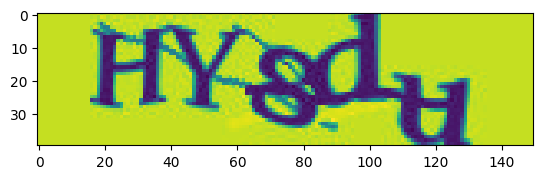

In [25]:
img = load_img(os.path.join(root, "HY8du.jpg"), color_mode="grayscale", target_size=(40,150))
plt.imshow(img)
img = np.array(img, dtype = float).reshape(40 , 150 , 1)
img /= 255.0
print(img)

In [26]:
root_lst = os.listdir(root)

img_label = [name.split('.')[0] for name in root_lst]
img_label[:10]

['tRn9U',
 'SfJkS',
 'pHsfW',
 'P5IsG',
 'sBWVf',
 'JjcWQ',
 'hli4B',
 'sBiHe',
 'krxPI',
 '5yMKf']

In [27]:
character= string.ascii_lowercase + string.ascii_uppercase + "0123456789" # All symbols captcha can contain
nchar = len(character) #total number of char possible
nchar

62

In [28]:
y = np.zeros((5,n,nchar))
for i , img in enumerate(img_label):
  target = np.zeros((5 , nchar))
  for j , k in enumerate(img):
    index = character.find(k)
    target[j , index] = 1
  y[:,i] = target

y.shape

(5, 113062, 62)

In [29]:
print(img_label[0])
print(y[0])

tRn9U
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [30]:
root_lst = os.listdir(root)

def load_data(start, end):
  dataset = np.zeros((end-start, 40, 150, 1))
  for i in range(start, end):
    img = load_img(os.path.join(root,root_lst[i]), color_mode="grayscale", target_size=(40,150))
    img = np.array(img, dtype = float).reshape(40 , 150 , 1)
    img = img/255.0

    dataset[i-start] = img

  labels = y[:,start:end]

  print("inside:" , labels.shape)

  return dataset,labels

inside: (5, 10, 62)


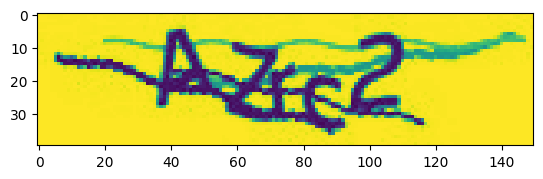

In [31]:
img, labels = load_data(10,20)

plt.imshow(img[0])

In [32]:
import keras
def createmodel():
    img = layers.Input(shape=imgshape) # Get image as an input of size 40 , 150 ,1
    rot = layers.RandomRotation(0.05, fill_mode = "nearest")(img)
    trans = layers.RandomTranslation(0.1,0.1, fill_mode = "nearest")(rot)
    zoom = layers.RandomZoom(height_factor = 0.05, width_factor = 0.1, fill_mode = "nearest")(trans)

    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(zoom) #50*200
    bn1 = layers.BatchNormalization()(conv1) #to improve the stability of model
    mp1 = layers.MaxPooling2D(padding='same')(bn1)  # 25*100
    # drp1 = layers.Dropout(0.2)(mp1)

    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    conv21 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(conv2)
    bn2 = layers.BatchNormalization()(conv21)
    mp2 = layers.MaxPooling2D(padding='same')(bn2)  # 13*50
    # drp2 = layers.Dropout(0.2)(mp2)


    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3) #to improve the stability of model
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 7*25
    # drp3 = layers.Dropout(0.25)(mp3)

    conv4 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(mp3)
    conv41 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(conv4)
    bn1 = layers.BatchNormalization()(conv41) #to improve the stability of model
    mp4 = layers.MaxPooling2D(padding='same')(bn1)  # 7*25

    conv5 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(mp4)
    bn2 = layers.BatchNormalization()(conv5) #to improve the stability of model
    mp5 = layers.MaxPooling2D(padding='same')(bn2)  # 7*25

    flat = layers.Flatten()(mp5) #convert the layer into 1-D

    outs = []
    for _ in range(5): #for 5 letters of captcha
        dens1 = layers.Dense(128, activation='relu')(flat)
        drop = layers.Dropout(0.2)(dens1) #drops 0.5 fraction of nodes
        res = layers.Dense(nchar, activation='softmax')(drop)

        outs.append(res) #result of layers

    # Compile model and return it
    model = Model(img, outs) #create model
    model.compile(loss="categorical_crossentropy", optimizer='RMSprop',metrics=["accuracy"])
    return model

In [33]:
model=createmodel()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 40, 150, 1)]         0         []                            
                                                                                                  
 random_rotation_1 (RandomR  (None, 40, 150, 1)           0         ['input_2[0][0]']             
 otation)                                                                                         
                                                                                                  
 random_translation_1 (Rand  (None, 40, 150, 1)           0         ['random_rotation_1[0][0]']   
 omTranslation)                                                                                   
                                                                                            

In [34]:
x_validate, y_validate = load_data(95000, 100000)

x_test, y_test= load_data(100000, n)

print(x_validate.shape)
print(y_validate.shape)

y_validate = y[:,95000:100000]
print(y_validate.shape)

inside: (5, 5000, 62)
inside: (5, 13062, 62)
(5000, 40, 150, 1)
(5, 5000, 62)
(5, 5000, 62)


In [35]:
x_train, y_train = load_data(0,45000)

print(x_train.shape)
print(y_train.shape)

inside: (5, 45000, 62)
(45000, 40, 150, 1)
(5, 45000, 62)


In [36]:
hist = model.fit(x_train , [y_train[0], y_train[1], y_train[2], y_train[3] ,y_train[4]] , batch_size = 4000, epochs=80 , validation_data= (x_validate , [y_validate[0], y_validate[1], y_validate[2], y_validate[3] ,y_validate[4]]))

Epoch 1/80
12/12 [==============================] - 48s 2s/step - loss: 21.6903 - dense_11_loss: 4.2762 - dense_13_loss: 4.2748 - dense_15_loss: 4.4198 - dense_17_loss: 4.3005 - dense_19_loss: 4.4190 - dense_11_accuracy: 0.0173 - dense_13_accuracy: 0.0165 - dense_15_accuracy: 0.0167 - dense_17_accuracy: 0.0169 - dense_19_accuracy: 0.0169 - val_loss: 20.6469 - val_dense_11_loss: 4.1261 - val_dense_13_loss: 4.1332 - val_dense_15_loss: 4.1266 - val_dense_17_loss: 4.1325 - val_dense_19_loss: 4.1286 - val_dense_11_accuracy: 0.0156 - val_dense_13_accuracy: 0.0164 - val_dense_15_accuracy: 0.0154 - val_dense_17_accuracy: 4.0000e-04 - val_dense_19_accuracy: 0.0192
Epoch 2/80
12/12 [==============================] - 9s 708ms/step - loss: 20.6341 - dense_11_loss: 4.1271 - dense_13_loss: 4.1265 - dense_15_loss: 4.1272 - dense_17_loss: 4.1264 - dense_19_loss: 4.1268 - dense_11_accuracy: 0.0180 - dense_13_accuracy: 0.0164 - dense_15_accuracy: 0.0184 - dense_17_accuracy: 0.0181 - dense_19_accuracy: 0

In [37]:
loss_epochs = hist.history["loss"]
val_loss_epochs = hist.history["val_loss"]
loss_epochs

[21.690261840820312,
 20.634136199951172,
 20.628793716430664,
 20.624113082885742,
 20.619869232177734,
 20.600582122802734,
 20.56104850769043,
 20.446657180786133,
 20.289697647094727,
 20.11741828918457,
 19.898853302001953,
 19.700477600097656,
 19.509511947631836,
 19.29710578918457,
 19.063764572143555,
 18.794034957885742,
 18.469310760498047,
 18.183317184448242,
 17.880516052246094,
 17.573043823242188,
 17.22682762145996,
 16.977243423461914,
 16.614242553710938,
 16.31153678894043,
 16.001096725463867,
 15.685436248779297,
 15.423579216003418,
 15.049087524414062,
 14.855860710144043,
 14.476552963256836,
 14.197569847106934,
 13.927992820739746,
 13.628816604614258,
 13.374656677246094,
 13.110461235046387,
 12.84853458404541,
 12.588190078735352,
 12.356857299804688,
 12.128161430358887,
 11.863075256347656,
 11.662334442138672,
 11.480255126953125,
 11.220829010009766,
 11.004192352294922,
 10.856334686279297,
 10.705183982849121,
 10.484396934509277,
 10.318520545959473

In [38]:
model.save("nn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
import keras
model = keras.models.load_model("nn.h5")

In [40]:
x_train, y_train = load_data(45000,95000)

print(x_train.shape)
print(y_train.shape)

inside: (5, 50000, 62)
(50000, 40, 150, 1)
(5, 50000, 62)


In [41]:
hist = model.fit(x_train , [y_train[0], y_train[1], y_train[2], y_train[3] ,y_train[4]] , batch_size = 4000, initial_epoch = 80, epochs=160 , validation_data= (x_validate , [y_validate[0], y_validate[1], y_validate[2], y_validate[3] ,y_validate[4]]))

Epoch 81/160
13/13 [==============================] - 26s 2s/step - loss: 7.1241 - dense_11_loss: 1.1354 - dense_13_loss: 1.5753 - dense_15_loss: 1.7959 - dense_17_loss: 1.5483 - dense_19_loss: 1.0692 - dense_11_accuracy: 0.6300 - dense_13_accuracy: 0.5240 - dense_15_accuracy: 0.4733 - dense_17_accuracy: 0.5299 - dense_19_accuracy: 0.6550 - val_loss: 5.7145 - val_dense_11_loss: 0.7593 - val_dense_13_loss: 1.2803 - val_dense_15_loss: 1.5651 - val_dense_17_loss: 1.3102 - val_dense_19_loss: 0.7996 - val_dense_11_accuracy: 0.7300 - val_dense_13_accuracy: 0.5964 - val_dense_15_accuracy: 0.5210 - val_dense_17_accuracy: 0.5862 - val_dense_19_accuracy: 0.7232
Epoch 82/160
13/13 [==============================] - 9s 726ms/step - loss: 6.9540 - dense_11_loss: 1.1051 - dense_13_loss: 1.5377 - dense_15_loss: 1.7632 - dense_17_loss: 1.5041 - dense_19_loss: 1.0439 - dense_11_accuracy: 0.6405 - dense_13_accuracy: 0.5340 - dense_15_accuracy: 0.4807 - dense_17_accuracy: 0.5420 - dense_19_accuracy: 0.65

In [42]:
model.evaluate(x_test , [y_test[0], y_test[1], y_test[2], y_test[3] ,y_test[4]])

409/409 [==============================] - 3s 7ms/step - loss: 3.5407 - dense_11_loss: 0.4661 - dense_13_loss: 0.8185 - dense_15_loss: 0.9512 - dense_17_loss: 0.8226 - dense_19_loss: 0.4823 - dense_11_accuracy: 0.8209 - dense_13_accuracy: 0.7268 - dense_15_accuracy: 0.6956 - dense_17_accuracy: 0.7261 - dense_19_accuracy: 0.8180


[3.5406696796417236,
 0.4660785496234894,
 0.8185128569602966,
 0.9512014985084534,
 0.822587788105011,
 0.482287734746933,
 0.8209309577941895,
 0.7268412113189697,
 0.6956055760383606,
 0.7260756492614746,
 0.8180217146873474]

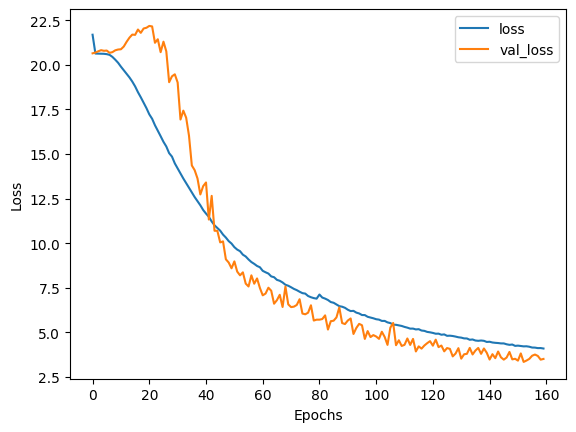

In [43]:
loss_epochs2 = hist.history["loss"]
val_loss_epochs2 = hist.history["val_loss"]
loss_epochs = loss_epochs+ loss_epochs2
val_loss_epochs = val_loss_epochs + val_loss_epochs2

plt.plot(loss_epochs, label="loss")
plt.plot(val_loss_epochs, label="val_loss")

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

1/1 [==============================] - 1s 515ms/step


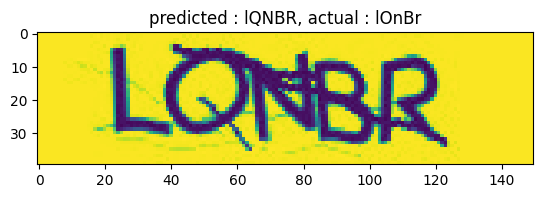

1/1 [==============================] - 0s 18ms/step


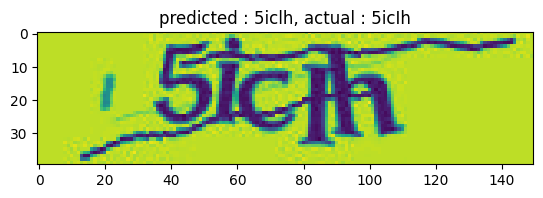

1/1 [==============================] - 0s 30ms/step


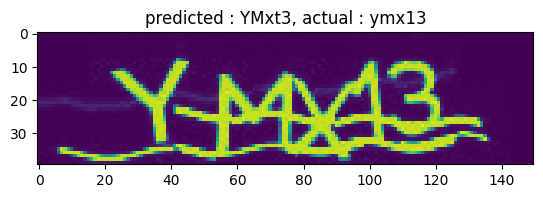

1/1 [==============================] - 0s 25ms/step


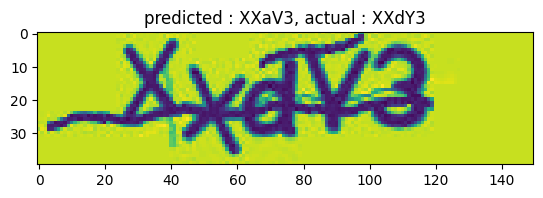

1/1 [==============================] - 0s 27ms/step


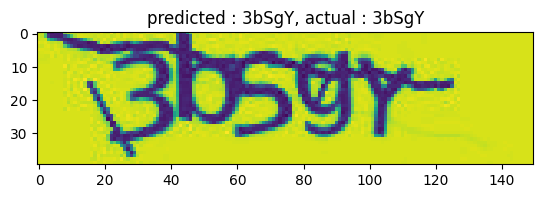

1/1 [==============================] - 0s 28ms/step


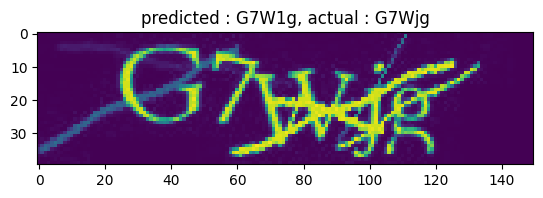

1/1 [==============================] - 0s 29ms/step


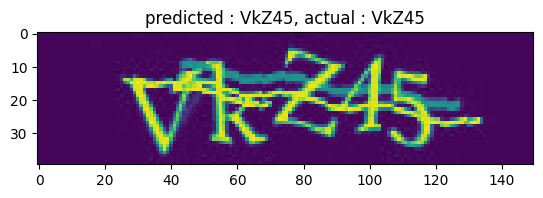

1/1 [==============================] - 0s 29ms/step


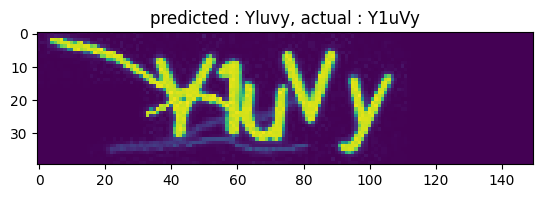

1/1 [==============================] - 0s 27ms/step


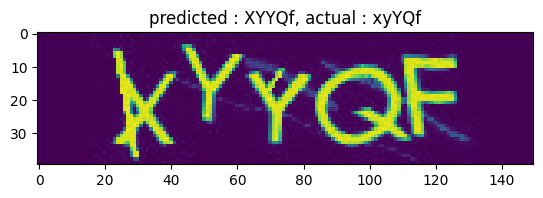

1/1 [==============================] - 0s 28ms/step


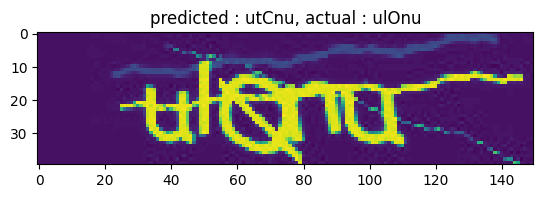

In [44]:
a = x_test[:10]
b = y_test[:,:10]

for j in range(len(a)):
  img_ = np.expand_dims(a[j], axis = 0)
  prediction = model.predict(img_)
  pred = ""
  ans = ""
  for i in range(5):
    p = prediction[i]
    idx = np.argmax(p)
    pred += character[idx]

    ans += character[np.argmax(b[i][j])]

  plt.imshow(a[j])
  plt.title(f'predicted : {pred}, actual : {ans}')
  plt.show()

In [45]:
a = x_test
b = y_test

predictions = np.array(model.predict(a, verbose=0))

right = 0
wrong = 0
for j in range(len(a)):
  # img.reshape(40,150,1)
  img_ = np.expand_dims(a[j], axis = 0)
  prediction = predictions[:,j:j+1]
  pred = ""
  ans = ""
  for i in range(5):
    p = prediction[i]
    idx = np.argmax(p)
    pred += character[idx]

    ans += character[np.argmax(b[i][j])]

  if (pred == ans):
    right += 1
  else:
    wrong += 1

  # if (j%100 == 0):
  #   print(f'predicted : {j}/1000')

print(right, wrong, right + wrong)

print(f"actual accuracy : {right*100/(right + wrong)}%")

4063 8999 13062
actual accuracy : 31.10549686112387%
